In [1]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END
from rich.console import Console

ModuleNotFoundError: No module named 'langgraph'

In [ ]:
console = Console()

### Define the graph state

In [ ]:
class PortfolioState(TypedDict):
    amount_usd: float
    interest_rate: float
    total_usd: float
    usd_to_inr: float
    total_inr: float

In [ ]:
pf_state = PortfolioState(
    amount_usd=1000.0,
    interest_rate=1.08,
    total_usd=0.0,
    usd_to_inr=85.46,
    total_inr=0.0,
)
pf_state

{'amount_usd': 1000.0,
 'interest_rate': 1.08,
 'total_usd': 0.0,
 'usd_to_inr': 85.46,
 'total_inr': 0.0}

In [ ]:
# node to calculate interest on usd investment
def calc_usd_with_interest(state: PortfolioState) -> PortfolioState:
    state["total_usd"] = state["amount_usd"] * state["interest_rate"]
    console.print(
        f"[green]Amount USD:[/green] {state['amount_usd']},\n[green]Interest Rate:[/green] {state['interest_rate']},\n [green]Total USD:[/green] {state['total_usd']}"
    )
    return state

In [ ]:
# convert usd to inr
def convert_usd_to_inr(state: PortfolioState) -> PortfolioState:
    state["total_inr"] = state["total_usd"] * state["usd_to_inr"]
    console.print(
        f"[green]Total USD:[/green] {state['total_usd']}[green],\n [green]Conv rate:[/green] {state['usd_to_inr']},\n [green]Total INR:[/green] {state['total_inr']:.4f}"
    )
    return state

In [ ]:
# build my graph
builder = StateGraph(PortfolioState)
# add nodes
builder.add_node("calc_usd_with_interest", calc_usd_with_interest)
builder.add_node("convert_usd_to_inr", convert_usd_to_inr)
# add edges
builder.add_edge(START, "calc_usd_with_interest")
builder.add_edge("calc_usd_with_interest", "convert_usd_to_inr")
builder.add_edge("convert_usd_to_inr", END)
# build the graph
graph = builder.compile()

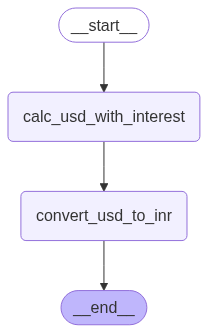

In [ ]:
# display the graph
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

In [ ]:
# invoke the graph
result = graph.invoke(pf_state)
console.print(result)

Amount USD: 1000.0,
Interest Rate: 1.08,
 Total USD: 1080.0

Total USD: 1080.0,
 Conv rate: 85.46,
 Total INR: 92296.8000

{
    'amount_usd': 1000.0,
    'interest_rate': 1.08,
    'total_usd': 1080.0,
    'usd_to_inr': 85.46,
    'total_inr': 92296.79999999999
}